# Problem Statement no 6
### Problem Statement   : Implement K-Means algorithm for clustering to create a Cluster on the given data.(Using Python)dataset : wine(cluster)
### Name                : Sahil A. Shaikh
### Class               : BE-11
### Roll No             : 43365


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("wineQualityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Cleaning Data : Eliminating null values

In [5]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

In [6]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data

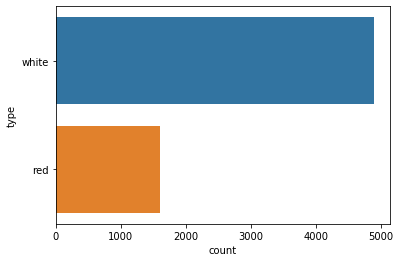

In [7]:
sns.countplot(y="type",data=df)

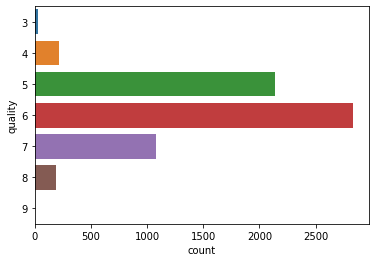

In [8]:
sns.countplot(y="quality",data=df)

## K-Means Clustering
### Find Optimum *k* using elbow method 

In [9]:
X = df[['volatile acidity','citric acid','chlorides','pH']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    models = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 100  ) )
    models.fit(X)
    inertia.append(models.inertia_)

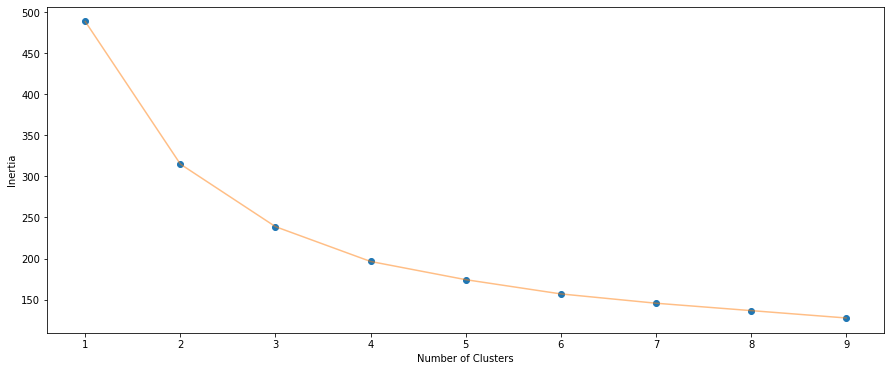

In [10]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## The graph below tells us that the *k* value which is considered quite optimum to be used for clustering is *k* = 2,3 and 4. We will try each value of *k* one after another

Trying *k* = 2 which can show the type of wine, i.e red or white

In [11]:
models = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
models.fit(X)
labels = models.labels_
centroids = models.cluster_centers_

In [12]:
print(models.cluster_centers_)
print(models.inertia_)
print(models.n_iter_)

[[0.60058197 0.15394872 0.07528525 3.35973507]
 [0.27937512 0.35681613 0.05159259 3.18571893]]
314.91438476015185
5


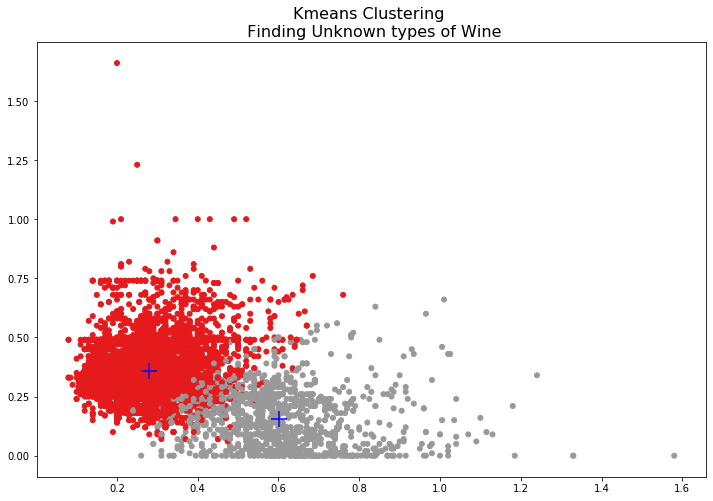

In [13]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models.labels_, cmap="Set1_r", s=25)
plt.scatter(models.cluster_centers_[:,0] ,models.cluster_centers_[:,1], color='blue', marker="+", s=250)
plt.title("Kmeans Clustering \n Finding Unknown types of Wine", fontsize=16)
plt.show()

Now Trying *k* = 3 which can show the quality of wine

In [14]:
models1 = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
models1.fit(X)
labels = models1.labels_
centroids = models1.cluster_centers_

In [15]:
print(models1.cluster_centers_)
print(models1.inertia_)
print(models1.n_iter_)

[[0.28978653 0.37900572 0.05403197 3.09132145]
 [0.63412214 0.14078955 0.07799237 3.34910953]
 [0.27419748 0.31857447 0.04890255 3.32767812]]
238.7535185513381
13


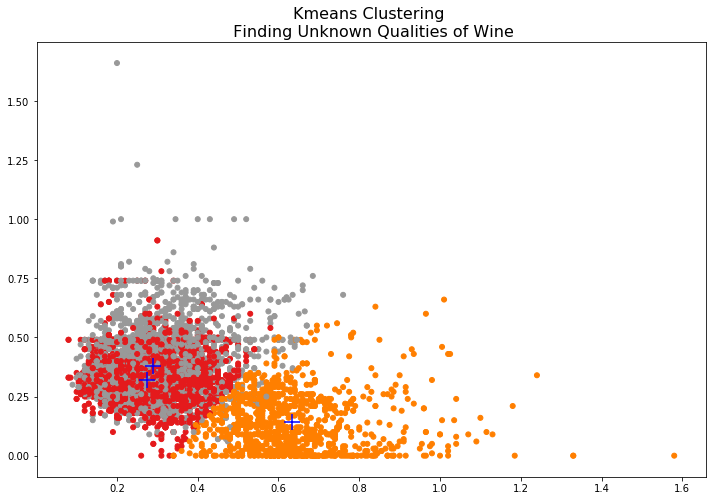

In [16]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models1.labels_, cmap="Set1_r", s=25)
plt.scatter(models1.cluster_centers_[:,0] ,models1.cluster_centers_[:,1], color='blue', marker="+", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Qualities of Wine", fontsize=16)
plt.show()

Now Trying *k* = 4 which can show the quality of wine

In [17]:
models2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
models2.fit(X)
labels = models2.labels_
centroids = models2.cluster_centers_

In [18]:
print(models2.cluster_centers_)
print(models2.inertia_)
print(models2.n_iter_)

[[0.27086167 0.31872117 0.04807285 3.35090147]
 [0.63483934 0.13598583 0.07751412 3.35185666]
 [0.27241205 0.29986278 0.04641095 3.101963  ]
 [0.3355346  0.53693023 0.07195167 3.12507608]]
196.3836977264644
15


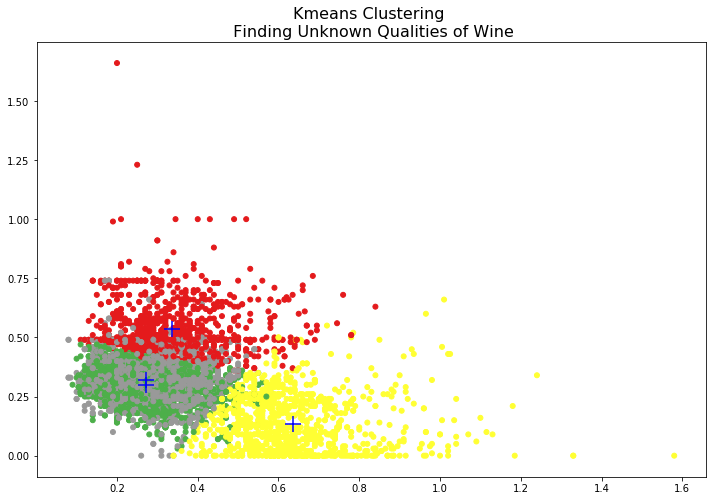

In [19]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models2.labels_, cmap="Set1_r", s=25)
plt.scatter(models2.cluster_centers_[:,0] ,models2.cluster_centers_[:,1], color='blue', marker="+", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Qualities of Wine", fontsize=16)
plt.show()

## Conclusion : From the observations we can see that the given dataset can be very useful to make cluster of the type of the wine, i.e red or white using K-means clustering. The quality of the wine using this dataset cannot be very useful as most of the clusters then overlaps each other